In [1]:
import trackpy as tp 
import pims
import glob
import numpy
import matplotlib.pyplot as plt

In [2]:
path = "../data/onion_2/Onion_bulk_20x/*.bmp"
frames = pims.as_grey(pims.open(path))#pims.open(path)

In [3]:
frames[0].shape

(200, 200)

Frame([[ 93.6543,  92.5139,  93.2293, ..., 114.9331, 119.4474, 126.3677],
       [102.4145, 101.9116, 101.6953, ..., 123.9857, 129.2875, 136.9232],
       [ 92.7226,  92.2976,  93.3735, ..., 114.9331, 119.9465, 124.7206],
       ...,
       [114.2096, 115.9875, 117.7067, ...,  93.05  ,  92.7616,  93.2645],
       [107.9409, 109.2938, 111.1572, ...,  86.1534,  86.1534,  85.7284],
       [111.4145, 113.9078, 115.627 , ...,  93.5491,  93.477 ,  93.2645]])
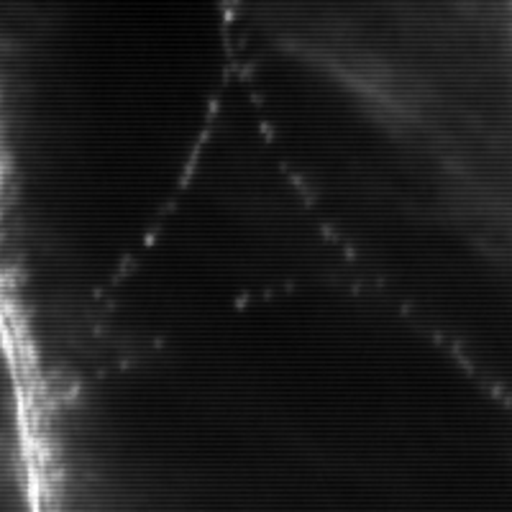

In [4]:
frames[0]

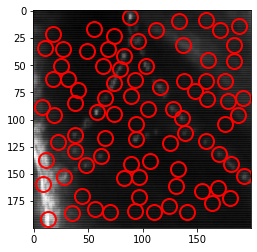

<AxesSubplot:>

In [5]:
loc = tp.locate(frames[0], diameter=11)
tp.annotate(loc, frames[0])

Frame 9: 57 trajectories present.


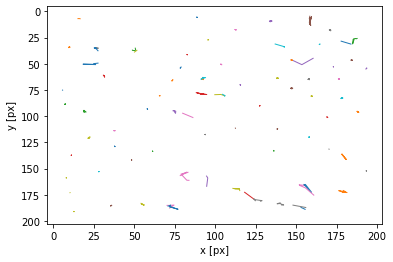

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [6]:
# to process the whole data run
all_imgs = tp.batch(frames[:10], diameter=11, minmass=20)
linked = tp.link(all_imgs, 10)
tp.plot_traj(linked)

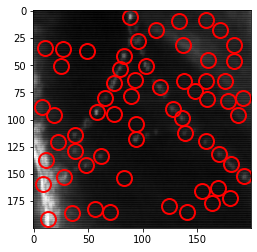

<AxesSubplot:>

In [7]:
tp.annotate(all_imgs[all_imgs.frame == 0], frames[0])

Alternatively we can look at the points from the raw image and pick out the colors of the dots before filtering

possible thresholding for image background to speed up the algorithm

Frame([[ 93.6543,  92.5139,  93.2293, ..., 114.9331, 119.4474, 126.3677],
       [102.4145, 101.9116, 101.6953, ..., 123.9857, 129.2875, 136.9232],
       [ 92.7226,  92.2976,  93.3735, ..., 114.9331, 119.9465, 124.7206],
       ...,
       [114.2096, 115.9875, 117.7067, ...,  93.05  ,  92.7616,  93.2645],
       [107.9409, 109.2938, 111.1572, ...,  86.1534,  86.1534,  85.7284],
       [111.4145, 113.9078, 115.627 , ...,  93.5491,  93.477 ,  93.2645]])
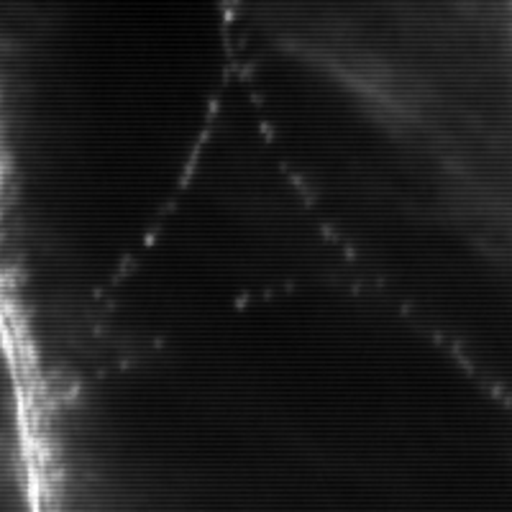

In [9]:
frames[0]

In [10]:
# thanks to Luc
def color_plot(img, show_frac=.1, hsv=True, pshow=1, mask=None):

    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    from matplotlib import colors
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors)

    if hsv:
        h, s, v = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2HSV))
    else:
        h, s, v = cv2.split(img)

    if mask is not None:
        h,s,v = h[mask], s[mask], v[mask]
    else:
        h,s,v = h.flatten(), s.flatten(), v.flatten()
    idx = np.random.choice(h.size, int(h.size*show_frac), replace=False)

    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    # print(len(pixel_colors))
    # raise Exception()
    axis.scatter(h[idx], s[idx], v[idx], facecolors=pixel_colors[idx].tolist(), marker=".")
    if hsv:
        axis.set_xlabel("Hue")
        axis.set_ylabel("Saturation")
        axis.set_zlabel("Value")
    else:
        axis.set_xlabel("Red")
        axis.set_ylabel("Green")
        axis.set_zlabel("Blue")

    if pshow:
        plt.show()

    return fig, axis